# __Desarrollo del modelo__

In [9]:
# Importar las bibliotecas necesarias
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

02:15:49 - cmdstanpy - INFO - Chain [1] start processing
02:15:51 - cmdstanpy - INFO - Chain [1] done processing


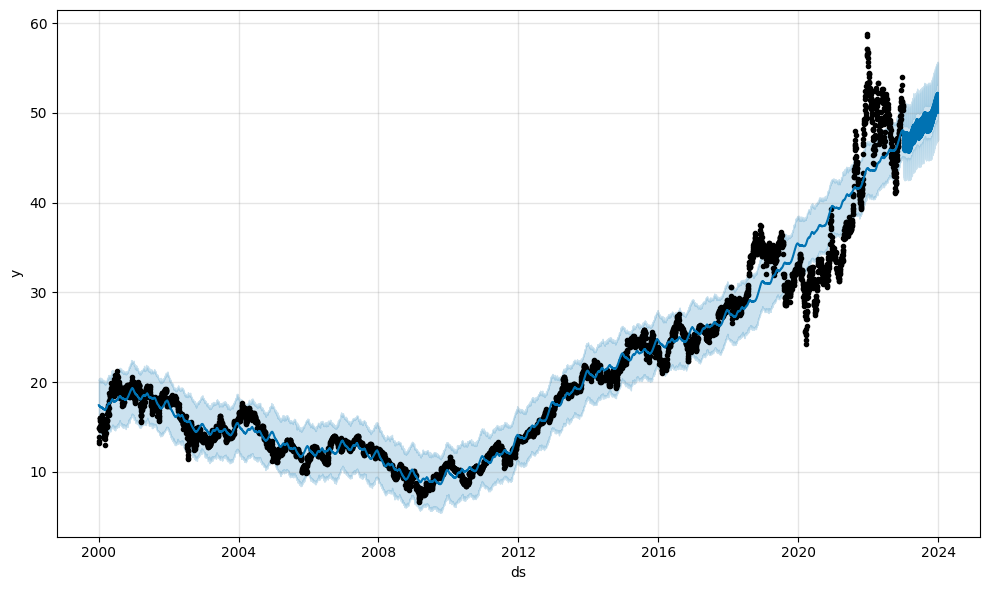

In [19]:
# Comenzamos!
df = pd.read_csv('CSVs/model_df.csv')

# Renombrar las columnas para que cumplan con el formato esperado por Prophet
df = df.rename(columns={'Fecha': 'ds', 'Valor': 'y'})

# Crear el modelo dado por la libreria Prophet
modelo = Prophet()

# Ajustamos el modelo a los datos
modelo.fit(df)

# Ahora se crea un dataframe con las fechas futuras a pronosticar
futuro = modelo.make_future_dataframe(periods=365)

# Realizar el pronóstico
pronostico = modelo.predict(futuro)

# Visualizacion del pronostico
fig = modelo.plot(pronostico)

In [16]:
#Revisamos el dataset
df

,index,y,ds,pfe_returns,sector
0,1,13.221450,2000-01-04,-0.037255,Pharmaceuticals
1,2,13.436877,2000-01-05,0.016294,Pharmaceuticals
2,3,13.921564,2000-01-06,0.036071,Pharmaceuticals
3,4,14.864030,2000-01-07,0.067698,Pharmaceuticals
4,5,14.837106,2000-01-10,-0.001811,Pharmaceuticals
...,...,...,...,...,...
5781,5782,51.358505,2022-12-23,0.003679,Pharmaceuticals
5782,5783,50.664871,2022-12-27,-0.013506,Pharmaceuticals
5783,5784,50.337872,2022-12-28,-0.006454,Pharmaceuticals
5784,5785,50.863052,2022-12-29,0.010433,Pharmaceuticals


In [18]:
#Exportar modelo
pronostico.to_csv('forecast_results.csv', index=False)